<a href="https://colab.research.google.com/github/cml096/GoogleColabRepo/blob/master/cristobal/Data-02/An%C3%A1lisis_Variables.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
df = pd.read_excel('OperTot - PowerView_ARCH1.xlsx')

In [2]:
list_drop = ['ID','shiftindex','crew#','unit#','tmcat08','tmcat09','tmcat10','tmcat11','tmcat12','tmcat13','tmcat14','tmcat15','tmcat16','tmcat17','tmcat18','tmcat19']
df.drop(list_drop,axis=1,inplace=True)

In [3]:
df["shift#"] = df["shift#"].astype(str)
df.totaltons = df.totaltons.astype(int)

In [4]:
def dia(fecha):
  aux = str(fecha.date()).split('-')
  dia = str(aux[2])
  return dia

def mes(fecha):
  aux = str(fecha.date()).split('-')
  mes = str(aux[1])
  return mes

def ano(fecha):
  aux = str(fecha.date()).split('-')
  ano = str(aux[0])
  return ano

In [5]:
df['Dia'] = df.apply(lambda row : dia(row['shiftdate']),axis=1)
df['Mes'] = df.apply(lambda row : mes(row['shiftdate']),axis=1)
df['Año'] = df.apply(lambda row : ano(row['shiftdate']),axis=1)

In [6]:
df_loads = df[(df.unit == 'Camion') | (df.unit == 'Pala')]
df_times = df[(df.unit == 'Aljibe') | (df.unit == 'Auxil') | (df.unit == 'Moto') | (df.unit == 'Perforadora') | (df.unit == 'Tractor')]

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

# Toda la data


In [8]:
df.columns

Index(['shiftdate', 'shift#', 'start', 'crew', 'eqmtid', 'logintime', 'locid',
       'operid', 'totaltime', 'pit', 'unit', 'totalloads', 'totaltons',
       'loadtime', 'idletime', 'spottime', 'loadcnt', 'tmcat00', 'tmcat01',
       'tmcat02', 'tmcat03', 'tmcat04', 'tmcat05', 'tmcat06', 'tmcat07', 'Dia',
       'Mes', 'Año'],
      dtype='object')

##logintime

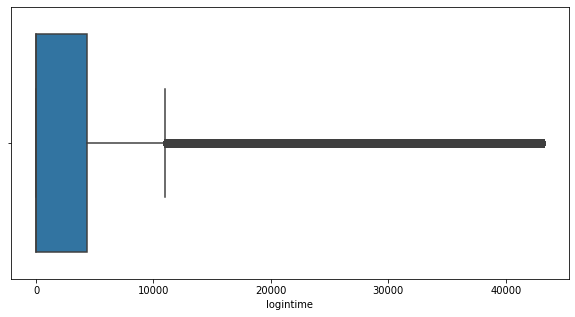

In [9]:
plt.figure(figsize=(10,5))
sns.boxplot(x=df.logintime)

##totaltime

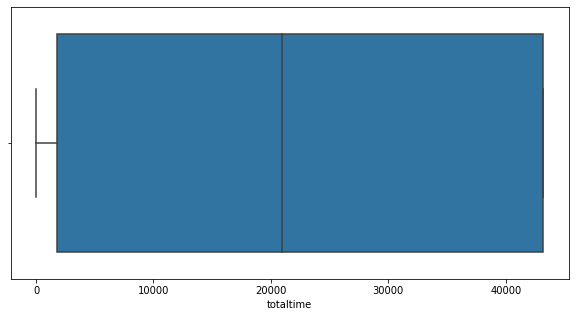

In [10]:
plt.figure(figsize=(10,5))
sns.boxplot(x=df.totaltime)

##totalloads

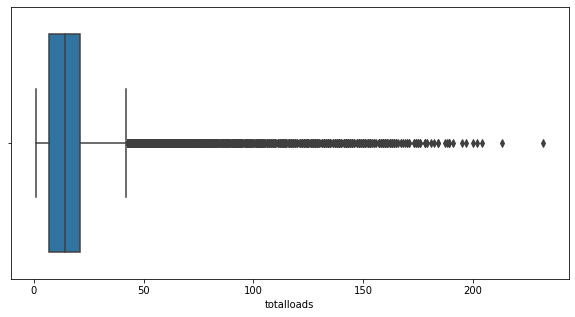

In [11]:
plt.figure(figsize=(10,5))
sns.boxplot(x=df.totalloads[df.totalloads != 0])

##totaltons

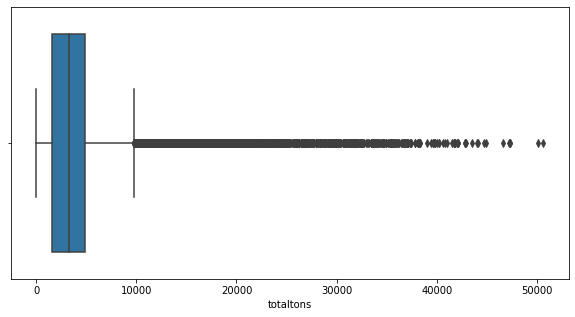

In [12]:
plt.figure(figsize=(10,5))
sns.boxplot(x=df.totaltons[df.totaltons != 0])

##loadtime

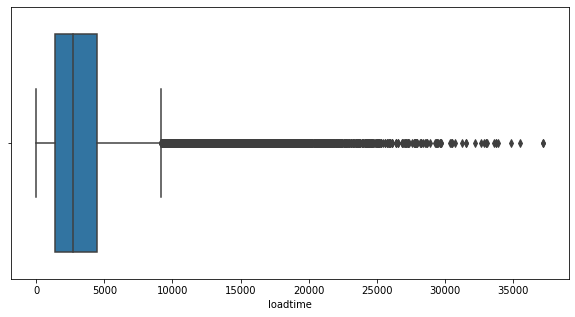

In [13]:
plt.figure(figsize=(10,5))
sns.boxplot(x=df.loadtime[df.loadtime != 0])

##idletime

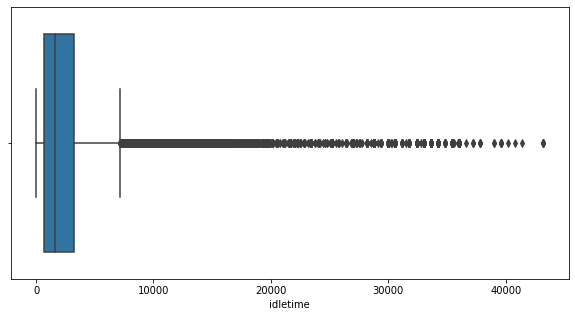

In [14]:
plt.figure(figsize=(10,5))
sns.boxplot(x=df.idletime[df.idletime != 0])

##spottime

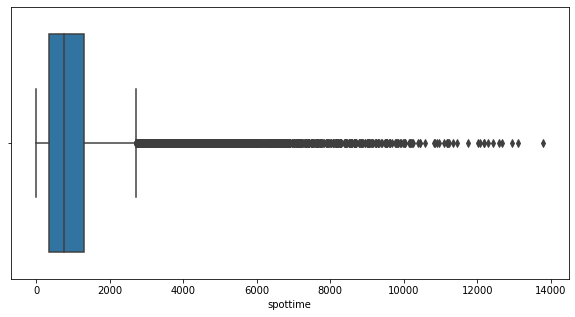

In [15]:
plt.figure(figsize=(10,5))
sns.boxplot(x=df.spottime[ (df.spottime != 0) & (df.spottime < 60000) ])

Se encontro un outlayer > 60.0000 seg 

##loadcnt

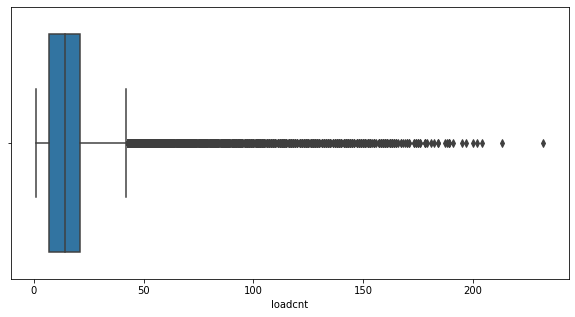

In [16]:
plt.figure(figsize=(10,5))
sns.boxplot(x=df.loadcnt[df.loadcnt != 0])

##tmcat00

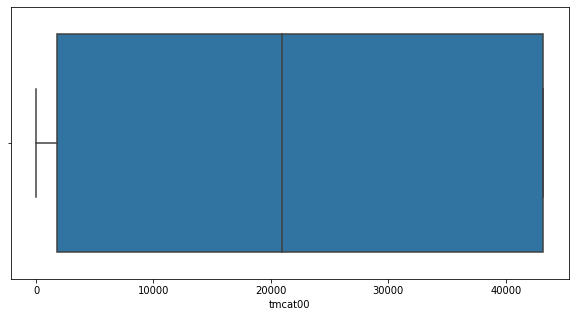

In [17]:
plt.figure(figsize=(10,5))
sns.boxplot(x=df.tmcat00)

##tmcat01

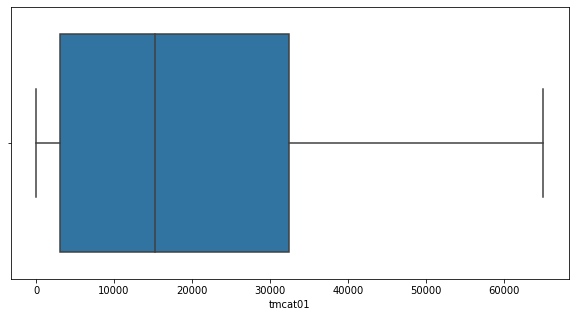

In [18]:
plt.figure(figsize=(10,5))
sns.boxplot(x=df.tmcat01[ df.tmcat01 != 0 ])

##tmcat02

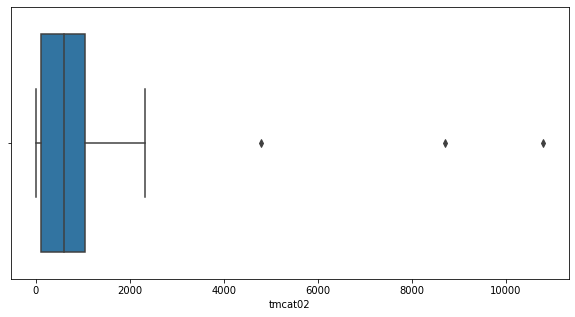

In [19]:
plt.figure(figsize=(10,5))
sns.boxplot(x=df.tmcat02[ df.tmcat02 != 0 ])

Revisar 3 valores (*)

##tmcat03

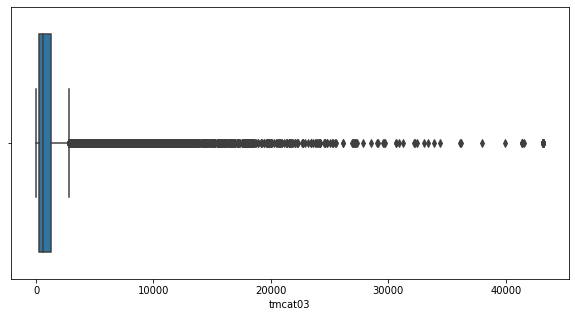

In [20]:
plt.figure(figsize=(10,5))
sns.boxplot(x=df.tmcat03[ df.tmcat03 != 0 ])

##tmcat04

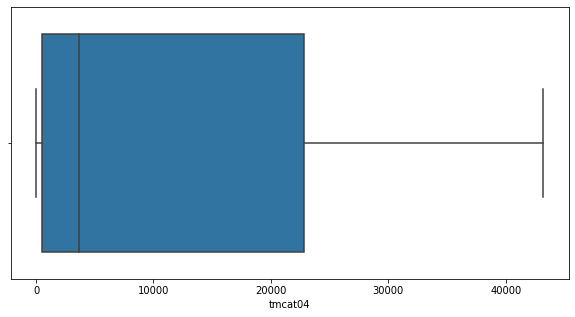

In [21]:
plt.figure(figsize=(10,5))
sns.boxplot(x=df.tmcat04[ df.tmcat04 != 0 ])

##tmcat05

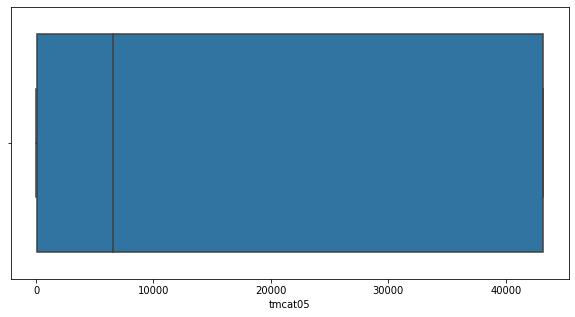

In [22]:
plt.figure(figsize=(10,5))
sns.boxplot(x=df.tmcat05[ df.tmcat05 != 0 ])

##tmcat06

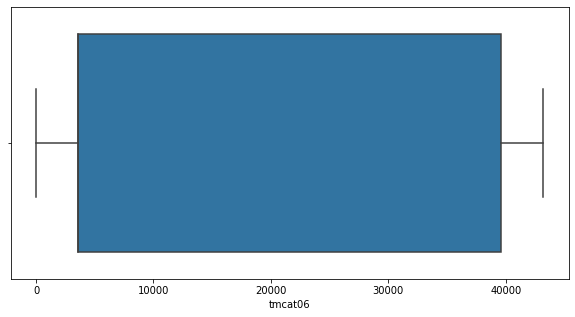

In [23]:
plt.figure(figsize=(10,5))
sns.boxplot(x=df.tmcat06[ df.tmcat06 != 0 ])

##tmcat07

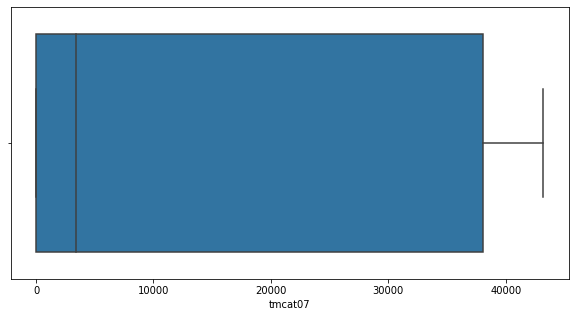

In [24]:
plt.figure(figsize=(10,5))
sns.boxplot(x=df.tmcat07[ df.tmcat07 != 0 ])

# Cargas (Data 1)

In [25]:
df_loads.columns

Index(['shiftdate', 'shift#', 'start', 'crew', 'eqmtid', 'logintime', 'locid',
       'operid', 'totaltime', 'pit', 'unit', 'totalloads', 'totaltons',
       'loadtime', 'idletime', 'spottime', 'loadcnt', 'tmcat00', 'tmcat01',
       'tmcat02', 'tmcat03', 'tmcat04', 'tmcat05', 'tmcat06', 'tmcat07', 'Dia',
       'Mes', 'Año'],
      dtype='object')

In [26]:
data_2019 = df_loads[df_loads.Año == "2019"]
data_2020 = df_loads[df_loads.Año == "2020"]

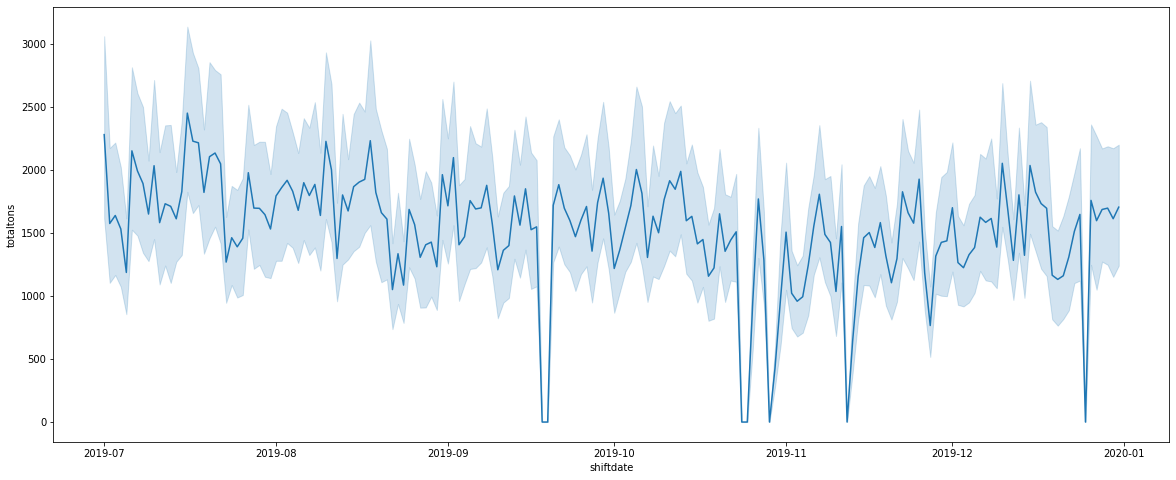

In [27]:
plt.figure(figsize=(20,8))
sns.lineplot(x="shiftdate", y="totaltons",data=data_2019)

Se encuentran 5 segmentos donde las toneladas son iguales a 0

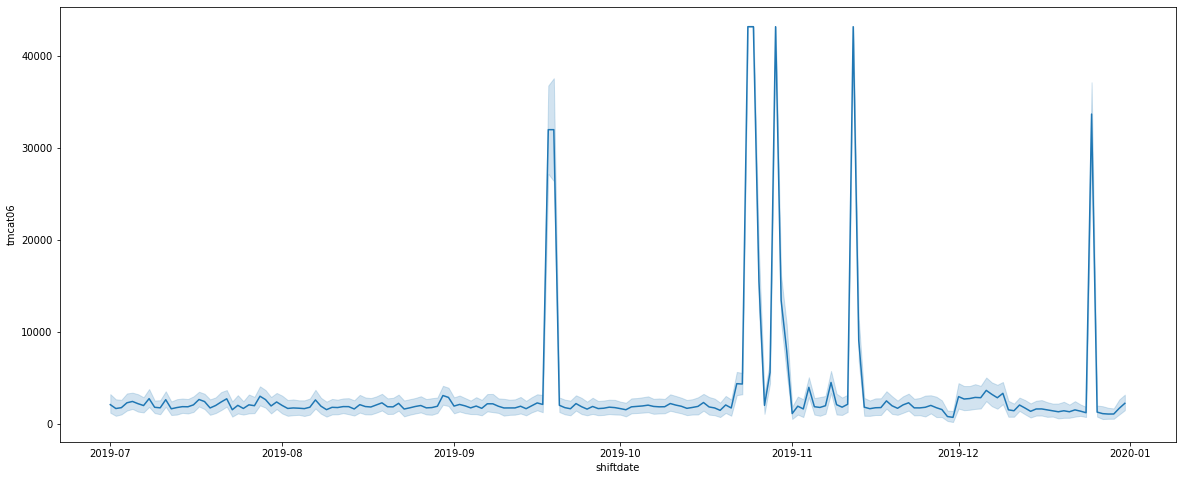

In [28]:
plt.figure(figsize=(20,8))
sns.lineplot(x="shiftdate", y="tmcat06",data=data_2019)

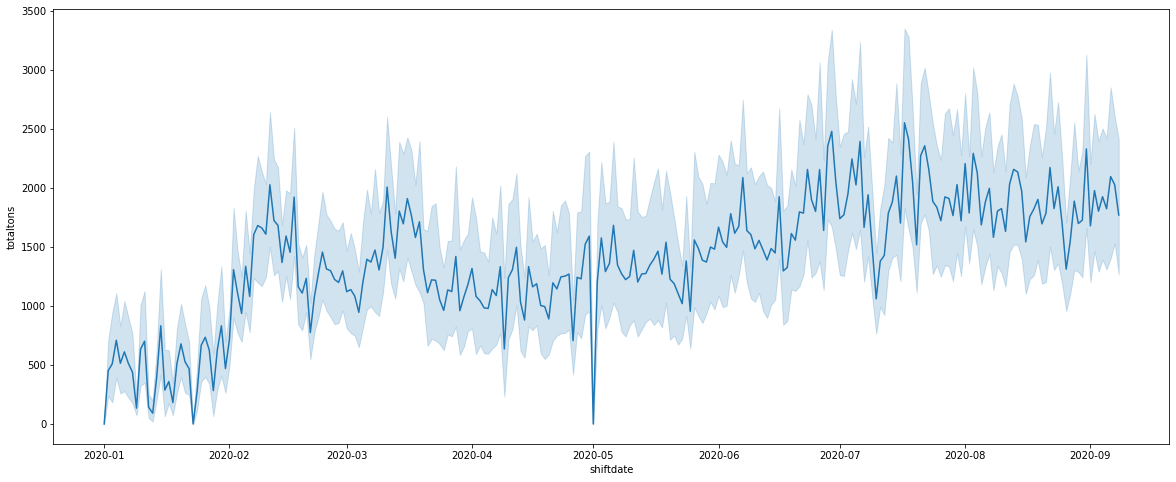

In [29]:
plt.figure(figsize=(20,8))
sns.lineplot(x="shiftdate", y="totaltons",data=data_2020)

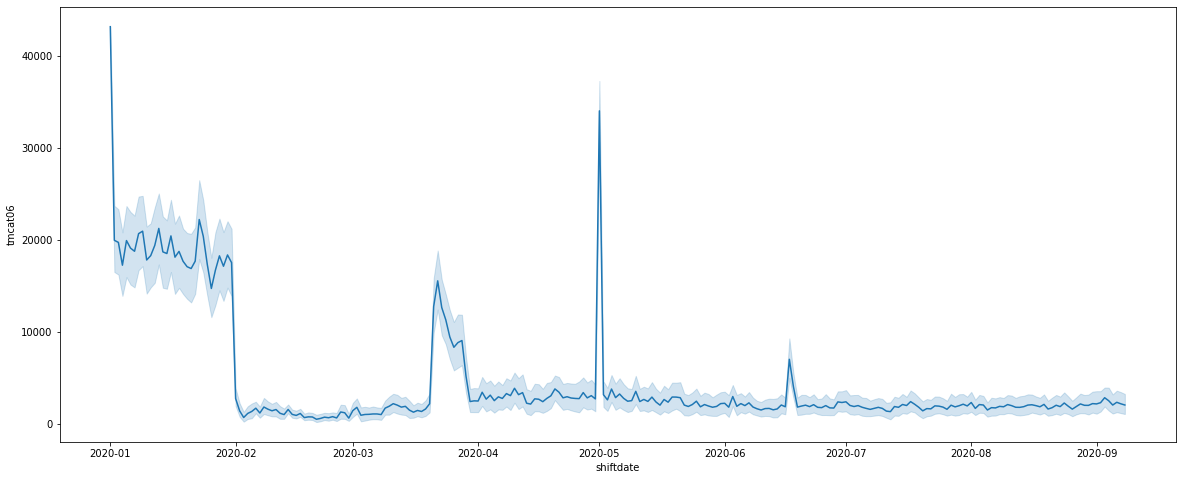

In [30]:
plt.figure(figsize=(20,8))
sns.lineplot(x="shiftdate", y="tmcat06",data=data_2020)

##Data 1 - Palas

In [31]:
df_palas = df_loads[df_loads.unit == 'Pala']

In [32]:
def rellena(value):
  if value == ' ':
    return 'vacio'
  else:
    return value

In [33]:
df_palas['locid_'] = df_palas.apply(lambda row : rellena(row['locid']),axis=1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [34]:
group = df_palas.groupby(['locid_']).count()
pd.DataFrame(group)

,shiftdate,shift#,start,crew,eqmtid,logintime,locid,operid,totaltime,pit,unit,totalloads,totaltons,loadtime,idletime,spottime,loadcnt,tmcat00,tmcat01,tmcat02,tmcat03,tmcat04,tmcat05,tmcat06,tmcat07,Dia,Mes,Año
locid_,,,,,,,,,,,,,,,,,,,,,,,,,,,,
ACOP DIB,221,221,221,221,221,221,221,221,221,221,221,221,221,221,221,221,221,221,221,221,221,221,221,221,221,221,221,221
ACOP-BOL-BRA,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4
ACOP-BRA,514,514,514,514,514,514,514,514,514,514,514,514,514,514,514,514,514,514,514,514,514,514,514,514,514,514,514,514
ACOP-BRA-BAJO-AL,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
ACOP-MAP ALTO P,205,205,205,205,205,205,205,205,205,205,205,205,205,205,205,205,205,205,205,205,205,205,205,205,205,205,205,205
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TY435129,38,38,38,38,38,38,38,38,38,38,38,38,38,38,38,38,38,38,38,38,38,38,38,38,38,38,38,38
TY435130,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11
TY450027,78,78,78,78,78,78,78,78,78,78,78,78,78,78,78,78,78,78,78,78,78,78,78,78,78,78,78,78


In [35]:
group = df_palas.groupby(['eqmtid']).count()
pd.DataFrame(group)

,shiftdate,shift#,start,crew,logintime,locid,operid,totaltime,pit,unit,totalloads,totaltons,loadtime,idletime,spottime,loadcnt,tmcat00,tmcat01,tmcat02,tmcat03,tmcat04,tmcat05,tmcat06,tmcat07,Dia,Mes,Año,locid_
eqmtid,,,,,,,,,,,,,,,,,,,,,,,,,,,,
025,982,982,982,982,982,982,982,982,982,982,982,982,982,982,982,982,982,982,982,982,982,982,982,982,982,982,982,982
026,950,950,950,950,950,950,950,950,950,950,950,950,950,950,950,950,950,950,950,950,950,950,950,950,950,950,950,950
029,902,902,902,902,902,902,902,902,902,902,902,902,902,902,902,902,902,902,902,902,902,902,902,902,902,902,902,902
030,871,871,871,871,871,871,871,871,871,871,871,871,871,871,871,871,871,871,871,871,871,871,871,871,871,871,871,871
210,1822,1822,1822,1822,1822,1822,1822,1822,1822,1822,1822,1822,1822,1822,1822,1822,1822,1822,1822,1822,1822,1822,1822,1822,1822,1822,1822,1822
211,2510,2510,2510,2510,2510,2510,2510,2510,2510,2510,2510,2510,2510,2510,2510,2510,2510,2510,2510,2510,2510,2510,2510,2510,2510,2510,2510,2510
212,1809,1809,1809,1809,1809,1809,1809,1809,1809,1809,1809,1809,1809,1809,1809,1809,1809,1809,1809,1809,1809,1809,1809,1809,1809,1809,1809,1809
213,2605,2605,2605,2605,2605,2605,2605,2605,2605,2605,2605,2605,2605,2605,2605,2605,2605,2605,2605,2605,2605,2605,2605,2605,2605,2605,2605,2605
304,324,324,324,324,324,324,324,324,324,324,324,324,324,324,324,324,324,324,324,324,324,324,324,324,324,324,324,324


###Análisis 
(loadtime	idletime	spottime == tmcat00)

In [36]:
df_carga = df_palas[(df_palas.loadcnt != 0) & (df_palas.tmcat01 != 0)]
df_no_carga = df_palas[df_palas.loadcnt == 0]

In [37]:
df_no_carga.describe()

,start,logintime,totaltime,totalloads,totaltons,loadtime,idletime,spottime,loadcnt,tmcat00,tmcat01,tmcat02,tmcat03,tmcat04,tmcat05,tmcat06,tmcat07
count,18644.000000,18644.000000,18644.000000,18644.0,18644.0,18644.000000,18644.000000,18644.000000,18644.0,18644.000000,18644.000000,18644.000000,18644.000000,18644.000000,18644.000000,18644.000000,18644.000000
mean,8004.033469,5832.298380,24708.500858,0.0,0.0,0.830348,2165.003433,1.010620,0.0,24708.500858,2167.069888,0.032182,522.146213,10217.386451,3655.758689,6874.440142,1271.667292
std,21724.289750,11668.162362,19467.126661,0.0,0.0,60.008467,7600.911833,18.672436,0.0,19467.126661,7600.600185,4.394219,1796.325274,17332.942064,10628.608857,14975.246338,6836.659281
min,-14400.000000,0.000000,1.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-14400.000000,0.000000,1667.750000,0.0,0.0,0.000000,0.000000,0.000000,0.0,1667.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,28800.000000,0.000000,39310.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,39310.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,28800.000000,1404.750000,43200.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,43200.000000,0.000000,0.000000,34.000000,16296.000000,0.000000,0.000000,0.000000
max,72000.000000,43195.000000,43200.000000,0.0,0.0,8093.000000,43200.000000,1196.000000,0.0,43200.000000,43200.000000,600.000000,43200.000000,43200.000000,43200.000000,43200.000000,43200.000000


In [38]:
df_carga.describe()

,start,logintime,totaltime,totalloads,totaltons,loadtime,idletime,spottime,loadcnt,tmcat00,tmcat01,tmcat02,tmcat03,tmcat04,tmcat05,tmcat06,tmcat07
count,8024.000000,8024.000000,8024.000000,8024.000000,8024.000000,8024.000000,8024.000000,8024.000000,8024.000000,8024.000000,8024.000000,8024.000000,8024.000000,8024.000000,8024.000000,8024.000000,8024.000000
mean,8551.345962,10715.129237,15994.719716,33.544367,7731.191052,6740.676595,3726.138210,1874.296361,33.544367,15994.719716,12347.087488,1.196660,982.567423,1286.845713,214.794118,1129.984172,32.244143
std,21645.174270,12427.981336,12798.135793,34.846163,8038.907071,6108.667989,4075.917124,1984.629448,34.846163,12798.135793,10486.577003,97.682564,1473.855114,4190.182358,1641.967089,2051.874469,463.394240
min,-14400.000000,0.000000,4.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,4.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-14400.000000,786.000000,5461.000000,8.000000,1908.000000,2000.000000,946.000000,432.750000,8.000000,5461.000000,3924.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000
50%,28800.000000,3799.500000,12260.500000,21.000000,4883.500000,4869.000000,2329.000000,1189.500000,21.000000,12260.500000,9405.500000,0.000000,480.500000,0.000000,0.000000,0.000000,0.000000
75%,28800.000000,21893.500000,23861.500000,48.000000,11030.750000,9762.250000,5071.500000,2675.000000,48.000000,23861.500000,17715.750000,0.000000,1362.000000,0.000000,6.000000,3498.250000,0.000000
max,72000.000000,42904.000000,43200.000000,232.000000,50616.000000,37191.000000,35975.000000,13801.000000,232.000000,43200.000000,43200.000000,8704.000000,27202.000000,40956.000000,42088.000000,23171.000000,23374.000000


In [39]:
def comparative(row):
  total_time = row.loadtime + row.idletime + row.spottime
  if total_time == row.tmcat01:
    return 1
  else:
    #print(f'suma : {total_time} != tmcat01 : {row.tmcat01} diferencia {row.tmcat01 - total_time}')
    return 0

In [40]:
df_carga.head()

,shiftdate,shift#,start,crew,eqmtid,logintime,locid,operid,totaltime,pit,unit,totalloads,totaltons,loadtime,idletime,spottime,loadcnt,tmcat00,tmcat01,tmcat02,tmcat03,tmcat04,tmcat05,tmcat06,tmcat07,Dia,Mes,Año,locid_
45,2019-07-01,2,28800,G2,307,3088,TX210039,07641,39893,MINA,Pala,100,23335,22347,5090,7656,100,39893,35320,0,2801,0,0,1772,0,01,07,2019,TX210039
141,2019-07-01,2,28800,G2,211,0,TX360085,mmsunk,16737,MINA,Pala,64,14648,6950,3566,3135,64,16737,13651,0,0,3086,0,0,0,01,07,2019,TX360085
142,2019-07-01,2,28800,G2,211,16737,TX360085,07046,26463,MINA,Pala,93,21134,10344,5537,5636,93,26463,21517,0,814,0,0,4132,0,01,07,2019,TX360085
145,2019-07-01,2,28800,G2,213,36779,TX240082,09270,6421,MINA,Pala,12,2833,1493,3525,575,12,6421,5593,0,367,0,461,0,0,01,07,2019,TX240082
148,2019-07-01,2,28800,G2,305,3153,LIMPIEZA345N,07561,1945,MINA,Pala,1,230,170,1048,724,1,1945,1942,0,0,3,0,0,0,01,07,2019,LIMPIEZA345N


In [41]:
df_carga['test'] = df_carga.apply(lambda row : comparative(row),axis=1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [42]:
group = df_carga.groupby(['test']).count()
pd.DataFrame(group)

,shiftdate,shift#,start,crew,eqmtid,logintime,locid,operid,totaltime,pit,unit,totalloads,totaltons,loadtime,idletime,spottime,loadcnt,tmcat00,tmcat01,tmcat02,tmcat03,tmcat04,tmcat05,tmcat06,tmcat07,Dia,Mes,Año,locid_
test,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,303,303,303,303,303,303,303,303,303,303,303,303,303,303,303,303,303,303,303,303,303,303,303,303,303,303,303,303,303
1,7721,7721,7721,7721,7721,7721,7721,7721,7721,7721,7721,7721,7721,7721,7721,7721,7721,7721,7721,7721,7721,7721,7721,7721,7721,7721,7721,7721,7721


In [43]:
df_carga[df_carga.test == 0]

,shiftdate,shift#,start,crew,eqmtid,logintime,locid,operid,totaltime,pit,unit,totalloads,totaltons,loadtime,idletime,spottime,loadcnt,tmcat00,tmcat01,tmcat02,tmcat03,tmcat04,tmcat05,tmcat06,tmcat07,Dia,Mes,Año,locid_,test
45,2019-07-01,2,28800,G2,307,3088,TX210039,07641,39893,MINA,Pala,100,23335,22347,5090,7656,100,39893,35320,0,2801,0,0,1772,0,01,07,2019,TX210039,0
201,2019-07-01,1,72000,G1,212,0,TX480079,mmsunk,39897,MINA,Pala,48,11040,5366,23348,4645,48,39897,33175,0,4935,0,0,1787,0,01,07,2019,TX480079,0
202,2019-07-01,1,72000,G1,213,0,TX240082,mmsunk,43200,MINA,Pala,161,36994,15987,9278,9378,161,43200,35478,0,4166,0,0,3556,0,01,07,2019,TX240082,0
1195,2019-07-04,1,-14400,G1,213,0,TX240086,mmsunk,808,MINA,Pala,1,246,8,0,268,1,808,505,0,303,0,0,0,0,04,07,2019,TX240086,0
1854,2019-07-06,1,-14400,G3,306,707,LIMPIEZA255N,07049,3446,MINA,Pala,7,1663,1717,959,737,7,3446,3428,0,10,0,8,0,0,06,07,2019,LIMPIEZA255N,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118725,2020-09-02,2,28800,G3,211,1002,TY270161,07303,23296,MINA,Pala,54,11588,9713,3591,4884,54,23296,18232,0,1465,0,12,3587,0,02,09,2020,TY270161,0
118797,2020-09-02,1,-14400,G4,212,926,TY180033,07862,6987,MINA,Pala,18,3770,1869,3476,498,18,6987,5916,0,1070,0,1,0,0,02,09,2020,TY180033,0
119304,2020-09-04,1,-14400,G4,211,0,TY270164,mmsunk,17269,MINA,Pala,59,12772,8694,3728,3236,59,17269,15762,0,1507,0,0,0,0,04,09,2020,TY270164,0
119648,2020-09-05,1,-14400,G1,212,20344,TY180095,07760,21666,MINA,Pala,44,9500,7100,8546,2684,44,21666,18429,0,0,0,10,3227,0,05,09,2020,TY180095,0


###Mejor día

In [46]:
df_tiempo = df_palas[df_palas.tmcat01 != 0]

Tiempo Efectivo (data tmcat01 != 0 y unit == Pala)

In [57]:
import numpy as np 
print(f' Tiempo Efectivo : {np.mean(df_tiempo.tmcat01)/3600} (horas)')

 Tiempo Efectivo : 3.42770063503298 (horas)


In [58]:
tmcat01 = np.mean(df_tiempo.tmcat01)

In [59]:
df_palas.columns

Index(['shiftdate', 'shift#', 'start', 'crew', 'eqmtid', 'logintime', 'locid',
       'operid', 'totaltime', 'pit', 'unit', 'totalloads', 'totaltons',
       'loadtime', 'idletime', 'spottime', 'loadcnt', 'tmcat00', 'tmcat01',
       'tmcat02', 'tmcat03', 'tmcat04', 'tmcat05', 'tmcat06', 'tmcat07', 'Dia',
       'Mes', 'Año', 'locid_'],
      dtype='object')

In [64]:
df_ = df_palas[df_palas.totaltons != 0]

In [66]:
df_carga[['totaltons','totalloads','loadcnt']].head()

,totaltons,totalloads,loadcnt
44,690,3,3
45,23335,100,100
141,14648,64,64
142,21134,93,93
145,2833,12,12


In [70]:
df_carga.totaltons.describe()

count     8165.000000
mean      7624.405389
std       8016.192911
min         44.000000
25%       1857.000000
50%       4749.000000
75%      10881.000000
max      50616.000000
Name: totaltons, dtype: float64

In [67]:
cargas = df_carga.totaltons/df_carga.loadcnt

In [69]:
cargas.describe()

count    8165.000000
mean      230.064555
std         9.026279
min        34.000000
25%       226.270833
50%       231.170732
75%       235.247191
max       263.000000
dtype: float64

Capacidad pala 61.2 tons

#Tiempos (Data 2)